In [297]:
import numpy as np
import matplotlib.pyplot as plt

In [298]:
nside = 64
P = np.eye(nside)
P = np.vstack([P, P, P, P, P])
nsamp = P.shape[0]

In [299]:
# rng = np.random.default_rng()
# m = rng.standard_normal(nside)
x = np.linspace(0, 2*np.pi, nside)
m = np.sin(x)

In [300]:
x = np.linspace(0, 2 * np.pi, nsamp)
n_corr = np.sin(10*x)

In [301]:
y = P@m + n_corr # + n

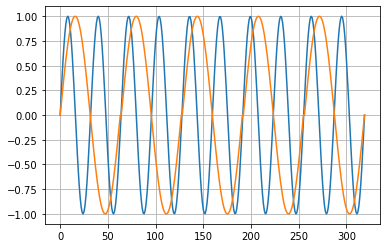

In [302]:
plt.plot(n_corr)
plt.plot(P@m)
# plt.plot(y)
plt.grid()

In [306]:
#Baselines matrix F

n_baseline = 2**6

F = np.zeros((n_baseline, nsamp))

assert len(y) % n_baseline == 0

cutoff = len(y) // n_baseline
offset = 0 
for i in range(n_baseline):
    F[i][offset:offset+cutoff] = 1
    offset+=cutoff
    
F = F.T

(64, 64) 63


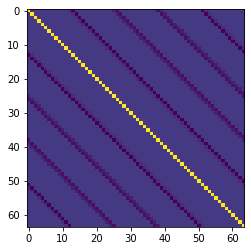

In [307]:
# destriping
Z = np.eye(nsamp) - P @ np.linalg.inv(P.T @ P) @ P.T

#Ax = b
A = F.T @ Z @ F 
b = F.T @ Z @ y

print(A.shape, np.linalg.matrix_rank(A))
plt.imshow(A)
# Solution for amplitudes
a = np.linalg.solve(A, b)

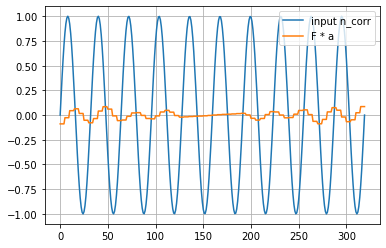

In [308]:
plt.plot(n_corr, label='input n_corr')
plt.plot(F @ a, label='F * a')
plt.grid()
plt.legend()

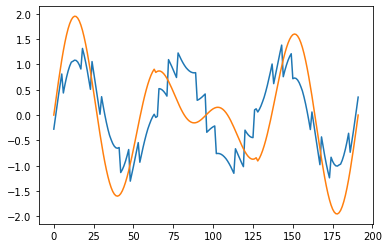

In [233]:
plt.plot(y-F@a)
plt.plot(y)

In [71]:
m_solver = np.linalg.inv(P.T @ P) @ P.T

m_destripe = m_solver @ (y - F @ a) #Destriping solution
m_bin = m_solver @ y #Binned map solution

#remove monopole
m_destripe -= np.mean(m_destripe)
m_bin -= np.mean(m_bin)

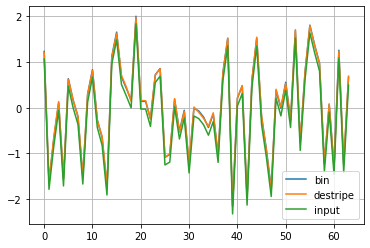

In [72]:
plt.plot(m_bin, label='bin')
plt.plot(m_destripe, label='destripe')
plt.plot(m, label='input')
plt.grid()
plt.legend()

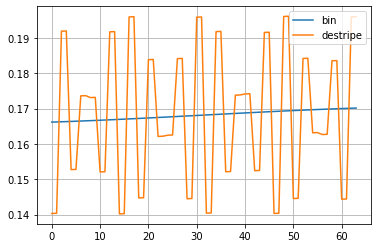

In [73]:
plt.plot(m_bin - m, label='bin')
plt.plot(m_destripe - m, label='destripe')
plt.grid()
plt.legend()